Name: Shadman Mahmood Khan Pathan

UIN: 01243104

CS822, Spring 2023

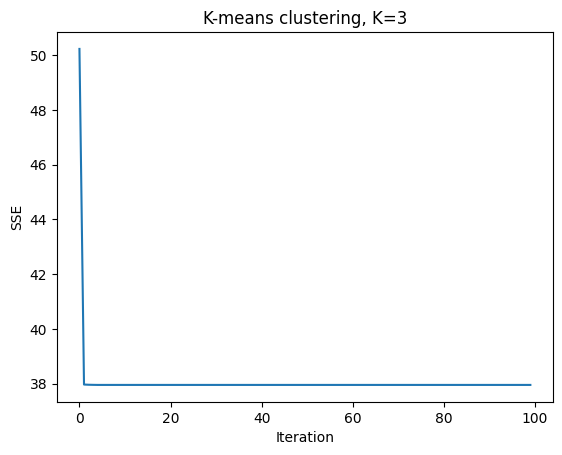

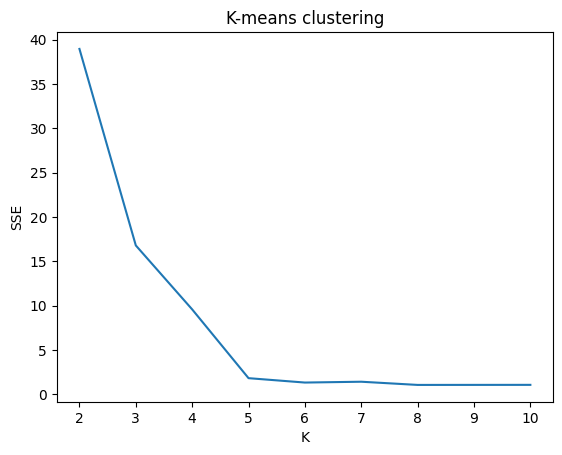

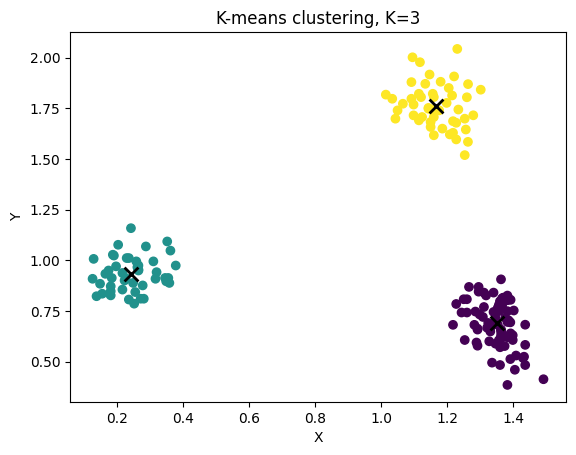

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def kmeans(X, K, max_iter=100):
    N, D = X.shape
    
    # Initialize centroids randomly
    centroids = X[np.random.choice(N, K, replace=False)]
    
    sse = []
    for i in range(max_iter):
        # Assign each data point to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=-1)
        cluster_labels = np.argmin(distances, axis=1)
        
        # Update centroids as mean of assigned data points
        for k in range(K):
            centroids[k] = np.mean(X[cluster_labels == k], axis=0)
        
        # Calculate SSE and append to list
        sse.append(np.sum(distances[np.arange(N), cluster_labels]**2))
    
    return cluster_labels, centroids, sse


# Load data
X = np.loadtxt('A.txt')

# Part (1): K=3 with SSE plot
cluster_labels, centroids, sse = kmeans(X, K=3)

plt.plot(sse)
plt.xlabel('Iteration')
plt.ylabel('SSE')
plt.title('K-means clustering, K=3')
plt.show()


# Part (2): SSE vs K plot
Ks = range(2, 11)
sse_values = []
for K in Ks:
    sse_runs = []
    for _ in range(5):
        _, _, sse = kmeans(X, K=K)
        sse_runs.append(sse[-1])
    sse_values.append(np.mean(sse_runs))

plt.plot(Ks, sse_values)
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('K-means clustering')
plt.show()


# Part (3): K=3 with cluster assignment plot
cluster_labels, centroids, _ = kmeans(X, K=3)

plt.scatter(X[:, 0], X[:, 1], c=cluster_labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, linewidths=2, color='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means clustering, K=3')
plt.show()
